# Homework 3
## Theory Part

**Q1. Consider a CNN that has**
1. Input of 14x14 with 30 channels.
2. A convolution layer C with 12 filters, each of size 4x4. The convolution zero padding is 1 and stride is 2, followed by a ReLU activation.
3. A max pooling layer P that is applied over each of the C's output feature map, using 3x3 receptive field and stride 2.

**What is the total size of C's output feature map?**

Convolution output size is given as

$$ O_{size} = ceil(( M + 2r - ksize + 1) / k) $$

where $M$ is the size of the concerned dimension, $r$ is padding and $k$ is stride, and $ksize$ is kernel size of the corresponding dimension. Therefore, 

$$ O_{size} = ceil(( 14 + 2*1 - 4 + 1) / 2) $$



In [1]:
import math

Osize = math.ceil((14 + 2*1 - 4 + 1)/2)
print(Osize)

7


So the total size of C's output feature map is 7x7.


**What is the total size of P's output feature map?**

Same formula, just without the padding.

In [2]:
Osize = math.ceil((7 - 3 + 1)/2)
print(Osize)

3


So the total size of O's output feature map is 3x3.

---

Now we want to compute the overhead of the above CNN in terms of floating point operation
(FLOP). FLOP can be used to measure computer’s performance. A decent processor nowadays
can perform in Giga-FLOPS, that means billions of FLOP per second. Assume the inputs are all
scalars (we have 14 × 14 × 30 scalars as input), we have the computational cost of:
1. 1 FLOP for a single scalar multiplication xi
· xj
2. 1 FLOP for a single scalar addition xi + xj
3. (n − 1) FLOPs for a max operation over n items: max{x1, ..., xn}

**How many FLOPs layer C and P cost in total to do one forward pass?**


For each cell of each filter in C's output feature map, there must necessarily be $ksize^2$ number of _multiplication_ done for each of the input _channel_ (for this 2d kernel).

$$ C_{mul} = O_{size}^2 * 30 * ksize^2 * filters$$
$$ C_{mul} = 7^2 * 30 * 4^2 * 12$$
$$ C_{mul} = 282240$$

For each cell of each filter in C's output feature map, there must also necessarily be $(ksize^2 - 1)$ number of _addition_ (for this 2d kernel) to sum up all multiplication that is done for that output cell, for each of the input _channel_ (????).

$$ C_{add} = O_{size}^2 * (ksize^2 - 1) * filters * channel$$
$$ C_{add} = 7^2 * (4^2 - 1) * 12 * 30$$
$$ C_{add} = 264600$$

For each cell of P's output feature map, there must be a _max operation_ operating on $ksize^2$ cells of the previous map.

$$ P_{max} = O_{size}^2 * C_{channel} * (ksize^2 - 1) $$

$$ P_{max} = 3^2 * 12 * (3^2 - 1)$$

$$ P_{max} = 864$$

so the total FLOP is,

$$ T_{FLOP} = C_{mul} + C_{add} + P_{max} $$

$$ T_{FLOP} = 282240 + 264600 + 864 $$

$$ T_{FLOP} = 547704 $$

***

..


**Q2 Refer to the neural network at _figure 1_ with input $x ∈ R^1$. The activation function for
$z_1$, $z_2$, and $z_3$ is the sigmoid function: $\frac{1}{1+e^{-w \cdot x}}$,**

$$ h(x) = \frac{1}{1+e^{-x}} \quad\quad (1)$$

$$ z_1 = h(x \cdot w_{(x,1)}) \quad\quad (2)$$

$$ z_2 = h(z_1 \cdot w_{(1,2)}) \quad\quad (3)$$

$$ z_3 = h(z_1 \cdot w_{(1,3)}) \quad\quad (4)$$

For the error E, instead of using the softmax function we learned in class, we use the quadratic
error function for regression purpose,

$$ E = \sum_{i \space \epsilon \space data } ((z_2 − y_{2i})^2 + (z_3 − y_{3i})^2)$$

[**6p**] Write down an expression for the gradients of all three weights: $ \frac{∂E}{∂w(x,1)}, \frac{∂E}{∂w(1,2)},\frac{∂E}{∂w(1,3)}$.




Going backwards through the network, 

$$ \newcommand{\partial}[1]{∂ #1} $$

$$ \frac{\partial{E}}{\partial{w(1,3)}} = \sum_{i \space \epsilon \space data } \frac{\partial{(z_2 − y_{2i})^2}}{\partial{w(1,3)}} + \frac{\partial{(z_3 − y_{3i})^2}}{\partial{w(1,3)}}$$

$$ \frac{\partial{E}}{\partial{w(1,3)}} = \sum_{i \space \epsilon \space data } \frac{\partial{(z_3 − y_{3i})^2}}{\partial{w(1,3)}}$$

$$ \frac{\partial{E}}{\partial{w(1,3)}} = \sum_{i \space \epsilon \space data } 2(z_3 − y_{3i}) \cdot \frac{\partial{z_3}}{\partial{w(1,3)}}$$

$$ \frac{\partial{E}}{\partial{w(1,3)}} = \sum_{i \space \epsilon \space data } 2(z_3 − y_{3i}) \cdot \frac{\partial{h(z_1 \cdot w_{(1,3)})}}{\partial{w(1,3)}}$$

$$ since \quad \quad \frac{\partial{h(x)}}{\partial(x)} = h(x) \cdot (1 - h(x)), \quad \quad \space <sigmoid>$$


$$ \frac{\partial{E}}{\partial{w(1,3)}} = \sum_{i \space \epsilon \space data } 2(z_3 − y_{3i}) \cdot h(z_1 \cdot w_{(1,3)}) \cdot (1-h(z_1 \cdot w_{(1,3)})) \cdot \frac{\partial{(z_1 \cdot w_{(1,3)})}}{\partial{w(1,3)}}$$

$$ \frac{\partial{E}}{\partial{w(1,3)}} = \sum_{i \space \epsilon \space data } 2(z_3 − y_{3i}) \cdot h(z_1 \cdot w_{(1,3)}) \cdot (1-h(z_1 \cdot w_{(1,3)})) \cdot z_1 $$

Likewise, 

$$ \frac{\partial{E}}{\partial{w(1,2)}} = \sum_{i \space \epsilon \space data } 2(z_2 − y_{2i}) \cdot h(z_1 \cdot w_{(1,2)}) \cdot (1-h(z_1 \cdot w_{(1,2)})) \cdot z_1 $$

As for $w_{(x,1)}$,

$$ \frac{\partial{E}}{\partial{w(x,1)}} = \sum_{i \space \epsilon \space data } \frac{\partial{(z_2 − y_{2i})^2}}{\partial{w(x,1)}} + \frac{\partial{(z_3 − y_{3i})^2}}{\partial{w(x,1)}}$$

$$ \frac{\partial{E}}{\partial{w(x,1)}} = \sum_{a \space \epsilon \space (2,3)} \sum_{i \space \epsilon \space data } \frac{\partial{(z_a − y_{ai})^2}}{\partial{w(x,1)}} $$

## Coding Part

In [3]:
import torch
from wk3_homework import *
import matplotlib.pyplot as plt
from torchvision import transforms

65 sea snake


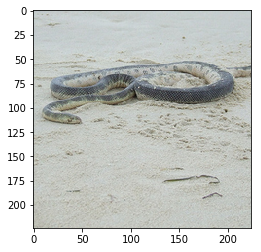

In [4]:
dataset_count = 100
root_path = '../datasets/imagenet_first2500/'
data_singlecrop = Wk3Dataset(root_path, data_limit=dataset_count, five_crop=False)

# testing Dataset subclass - single center crop
first_img = data_singlecrop[0]
print(first_img['label'], data_singlecrop.classes[first_img['label']])
image = transforms.ToPILImage()(first_img['image'])
plt.imshow(image)

809 soup bowl


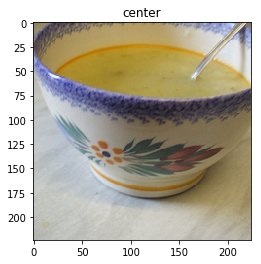

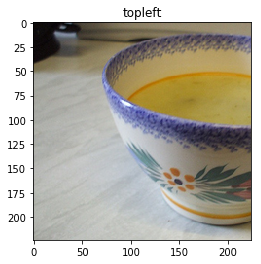

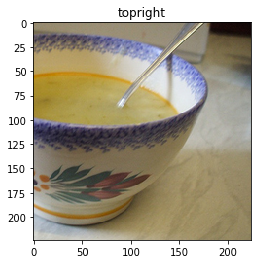

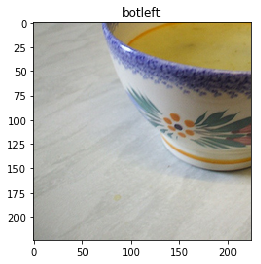

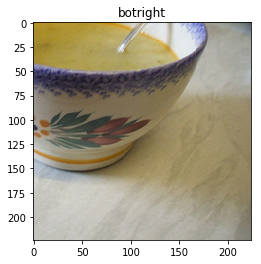

In [5]:
dataset_count = 100
root_path = '../datasets/imagenet_first2500/'
data_fivecrop = Wk3Dataset(root_path, data_limit=dataset_count, five_crop=True)

# testing Dataset subclass - single center crop
first_img = data_fivecrop[3]
print(first_img['label'], data_fivecrop.classes[first_img['label']])

pos = ['center', 'topleft', 'topright','botleft', 'botright']
for i in range(5):
    image = transforms.ToPILImage()(first_img['image'][i])
    plt.figure()
    plt.title(pos[i])
    plt.imshow(image)

In [6]:
valset, model = run_training(five_crop=False, dataset_count=10)

dataset length 9 torch.Size([3, 224, 224])
dataset length 1 torch.Size([3, 224, 224])
Train - Epoch 0..
      >> Epoch loss 0.78355 accuracy 0.000                      in 4.4771s
Train - Epoch 1..
      >> Epoch loss 0.73876 accuracy 0.000                      in 4.0231s
Val - Epoch 0..
      >> Epoch loss 7.14855 accuracy 0.000                      in 2.8299s


In [7]:
valset, model = run_training(five_crop=True, dataset_count=10)

dataset length 9 torch.Size([5, 3, 224, 224])
dataset length 1 torch.Size([3, 224, 224])
Train - Epoch 0..
      >> Epoch loss 0.15145 accuracy 0.022                      in 6.7089s
Train - Epoch 1..
      >> Epoch loss 0.14117 accuracy 0.000                      in 6.5132s
Val - Epoch 0..
      >> Epoch loss 6.88147 accuracy 0.000                      in 2.6504s
